In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds_train = pd.read_csv('outputs/df_train.csv')
diamonds_train_price = pd.read_csv('outputs/df_train_price.csv')
diamonds_predict=pd.read_csv('outputs/df_test.csv')
submit=pd.read_csv('inputs/sample_submission.csv')

In [3]:
diamonds_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,-1.051355,-0.810564,0.352161,-0.033632,0.736126,-0.650176,-1.283716,-1.236438,-1.180531
1,-0.966764,0.982588,0.940769,-0.641579,0.596363,-1.097476,-1.132102,-1.080061,-1.039596
2,-0.839879,-0.810564,1.529377,-0.641579,-1.010919,2.033618,-0.918059,-0.854183,-0.969129
3,-0.839879,0.086012,-0.825055,0.574315,0.037308,0.781181,-0.900222,-0.862870,-0.870475
4,0.217504,-0.810564,1.529377,-0.641579,-0.521746,2.480917,0.330526,0.344710,0.271096


In [4]:
diamonds_predict.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,3.267015,0.978152,-1.416151,-1.232414,-0.666318,-1.554540,2.620734,2.539800,2.446736
1,2.596725,0.978152,-0.830504,-1.232414,0.168508,-0.658049,2.175567,2.234832,2.230593
2,-0.608098,0.978152,-1.416151,-0.627731,-0.040199,-1.554540,-0.495431,-0.491942,-0.492811
3,-1.047976,0.978152,-1.416151,-0.627731,-0.318474,-0.658049,-1.261117,-1.263332,-1.285335
4,0.334497,-2.592365,-0.830504,-0.023048,4.899190,-0.658049,0.332578,0.216660,0.890505


# Split train and test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diamonds_train, diamonds_train_price, test_size=0.03)

In [6]:
X_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
16987,-1.009060,-0.810564,-1.413663,-0.033632,1.155417,-1.097476,-1.212368,-1.219063,-1.095970
13326,1.486362,-2.603715,0.940769,-1.249527,2.133762,-1.097476,1.365068,1.230848,1.595882
22730,0.217504,-1.707140,0.940769,-1.249527,1.644589,-0.202877,0.303771,0.309959,0.510685
7370,0.746195,0.982588,0.940769,-0.033632,-0.242219,-0.202877,0.892390,0.892031,0.848928
40306,-1.030207,0.982588,0.940769,-0.033632,0.037308,-0.650176,-1.230205,-1.184313,-1.194624


In [7]:
y_test.head()

,price
34795,1813
20849,2305
5287,2602
18735,929
26408,3464


# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
diamonds_model= LinearRegression()

In [10]:
diamonds_model.fit(X_train, y_train)
print('Coeff >>>>',diamonds_model.coef_)
print('Intercept >>>>',diamonds_model.intercept_)

Coeff >>>> [[ 5151.8120098    136.04784224   547.14546655   819.57288278
   -111.26138334   -53.59293577 -1025.41517865    20.34614846
    -18.45529672]]
Intercept >>>> [3929.83996924]


In [11]:
pre = diamonds_model.predict(X_test)

In [12]:
y_test_linear = y_test.copy()
y_test_linear['y']= pre

In [13]:
y_test_linear['Price-y'] = abs(y_test_linear['price']- y_test_linear['y'])
y_test_linear.describe()

,price,y,Price-y
count,1214.000000,1214.000000,1214.000000
mean,3838.683690,3876.163061,790.314764
std,3843.428693,3651.332912,857.606101
min,361.000000,-2652.424344,0.279303
25%,1000.500000,1215.329833,274.521691
50%,2399.000000,2832.528105,558.689087
75%,5188.250000,5747.061704,992.240957
max,18709.000000,20306.948500,8922.980732


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
print( "Errore quadratico medio:% .2f" % mean_squared_error ( y_test_linear['price'], y_test_linear['y']))
print( 'R²:% .2f' % r2_score ( y_test_linear['price'], y_test_linear['y']))

Errore quadratico medio: 1359479.81
R²: 0.91


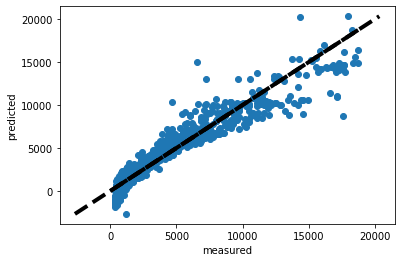

In [15]:
fig, ax = plt.subplots()
ax.scatter( y_test_linear['price'], y_test_linear['y'])
ax.plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'RMSE={mean_squared_error(pre, y_test)**0.5}')

RMSE=1165.9673289710706
